<a href="https://colab.research.google.com/github/OmerElkayam/GeoDB-Cities-API-Data-Collection/blob/main/GeoDB%20Cities%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install seaborn





In [ ]:
import requests
import json
import time
import pandas as pd

url = "https://wft-geo-db.p.rapidapi.com/v1/geo/cities"
headers = {
	"x-rapidapi-key": "e82c70070emshcec9e2d69807c17p183035jsn9419fa6dfe79",
	"x-rapidapi-host": "wft-geo-db.p.rapidapi.com"
}

querystring  = {
    'limit': 10,
    'offset': 0,
    'minPopulation': 1000
}

all_cities = []

for i in range(100):
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        cities = response.json()['data']
        all_cities.extend(cities)
        querystring ['offset'] += 10
    else:
        print(f"Error {response.status_code}: {response.text}")
    time.sleep(3)
    #בסופו של דבר, לאחר שהלולאה רצה 100 פעמים, הרשימה all_cities תכיל את הנתונים על הערים שנשלפו מה-API. אפשר להשתמש בנתונים האלה לעיבוד נוסף או לשמור אותם כ-DataFrame של pandas.

In [ ]:
data = 'data.json'
with open(data, 'w', encoding='utf-8') as f:
    json.dump(all_cities, f, ensure_ascii=False, indent=4)

In [ ]:
df = pd.DataFrame(all_cities)

df.to_csv('data.csv', index=False, encoding='utf-8')

In [ ]:
df.info() #1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   wikiDataId   1000 non-null   object 
 2   type         1000 non-null   object 
 3   city         1000 non-null   object 
 4   name         1000 non-null   object 
 5   country      1000 non-null   object 
 6   countryCode  1000 non-null   object 
 7   region       999 non-null    object 
 8   regionCode   999 non-null    object 
 9   regionWdId   999 non-null    object 
 10  latitude     1000 non-null   float64
 11  longitude    1000 non-null   float64
 12  population   1000 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 101.7+ KB


In [ ]:
df.head() #2

,id,wikiDataId,type,city,name,country,countryCode,region,regionCode,regionWdId,latitude,longitude,population
0,3350606,Q24668,CITY,Aixirivall,Aixirivall,Andorra,AD,Sant Julià de Lòria,06,Q24282,42.462450,1.502090,1025
1,3673384,Q2522163,CITY,Andorra la Vella,Andorra la Vella,Andorra,AD,Andorra la Vella,07,Q2522163,42.500000,1.500000,22615
2,397,Q1863,CITY,Andorra la Vella,Andorra la Vella,Andorra,AD,Andorra la Vella,07,Q2522163,42.500000,1.500000,24042
3,866,Q24554,CITY,Arinsal,Arinsal,Andorra,AD,La Massana,04,Q24276,42.566667,1.483333,1419
4,3641313,Q386802,CITY,Canillo,Canillo,Andorra,AD,Canillo,02,Q24260,42.566400,1.597050,3292


In [ ]:
df.tail() #3

,id,wikiDataId,type,city,name,country,countryCode,region,regionCode,regionWdId,latitude,longitude,population
995,132324,Q1190301,ADM2,Cainguás department,Cainguás department,Argentina,AR,Misiones Province,N,Q44798,-27.216667,-54.966667,53267
996,132634,Q665082,ADM2,Calamuchita Department,Calamuchita Department,Argentina,AR,Córdoba Province,X,Q44759,-31.983333,-64.366667,45418
997,1832,Q1955294,CITY,Calchaquí (Santa Fe),Calchaquí (Santa Fe),Argentina,AR,Santa Fe Province,S,Q44823,-29.892800,-60.266700,10221
998,1562,Q1026633,CITY,Caleta Olivia,Caleta Olivia,Argentina,AR,Santa Cruz Province,Z,Q44821,-46.433333,-67.533333,51733
999,132629,Q1190307,ADM2,Caleu Caleu Department,Caleu Caleu Department,Argentina,AR,La Pampa Province,L,Q44795,-38.982222,-64.090556,2075


In [ ]:
df.describe() #4

,id,latitude,longitude,population
count,1.000000e+03,1000.000000,1000.000000,1.000000e+03
mean,1.446926e+06,22.066723,22.877939,6.139038e+04
std,1.658680e+06,28.205064,38.321715,2.511106e+05
min,1.000000e+00,-46.433333,-71.300000,1.000000e+03
25%,5.967500e+02,-8.651667,15.736708,2.145750e+03
50%,1.864500e+03,40.034861,43.845694,6.932500e+03
75%,3.262112e+06,40.640180,44.681528,3.256075e+04
max,3.839837e+06,42.597580,73.349167,4.273156e+06


In [ ]:
df.isnull() #5

,id,wikiDataId,type,city,name,country,countryCode,region,regionCode,regionWdId,latitude,longitude,population
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.notnull() #6

,id,wikiDataId,type,city,name,country,countryCode,region,regionCode,regionWdId,latitude,longitude,population
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
df.duplicated() #7

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
df.shape #8

(1000, 13)

In [ ]:
df.columns #9

Index(['id', 'wikiDataId', 'type', 'city', 'name', 'country', 'countryCode',
       'region', 'regionCode', 'regionWdId', 'latitude', 'longitude',
       'population'],
      dtype='object')

In [ ]:
df.dtypes #10

id               int64
wikiDataId      object
type            object
city            object
name            object
country         object
countryCode     object
region          object
regionCode      object
regionWdId      object
latitude       float64
longitude      float64
population       int64
dtype: object

In [ ]:
df.city # 11

0                  Aixirivall
1            Andorra la Vella
2            Andorra la Vella
3                     Arinsal
4                     Canillo
                ...          
995       Cainguás department
996    Calamuchita Department
997      Calchaquí (Santa Fe)
998             Caleta Olivia
999    Caleu Caleu Department
Name: city, Length: 1000, dtype: object

In [ ]:
df.country #12

0        Andorra
1        Andorra
2        Andorra
3        Andorra
4        Andorra
         ...    
995    Argentina
996    Argentina
997    Argentina
998    Argentina
999    Argentina
Name: country, Length: 1000, dtype: object

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


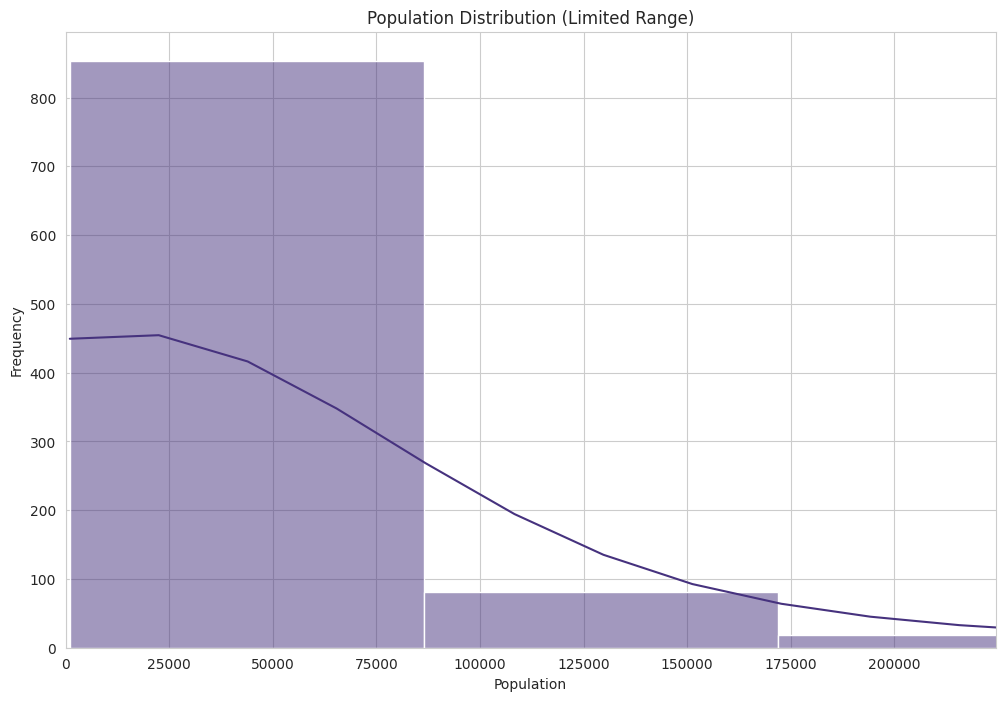

In [ ]:
sns.set_style("whitegrid")  # Try other styles like 'darkgrid', 'ticks'
sns.set_palette("viridis")   # Try other palettes like 'coolwarm', 'magma'
#קוד יוצר תרשים היסטוגרמה שמציג את התפלגות האוכלוסייה עם תחום מוגבל עד האחוזון ה-95, כולל קו צפיפות ההערכה, ומאפשר לראות את התפלגות הנתונים בצורה ברורה ומובנת.
plt.figure(figsize=(12, 8))
sns.histplot(df['population'], bins=50, kde=True)
plt.title('Population Distribution (Limited Range)')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.xlim(0, df['population'].quantile(0.95))
plt.show()

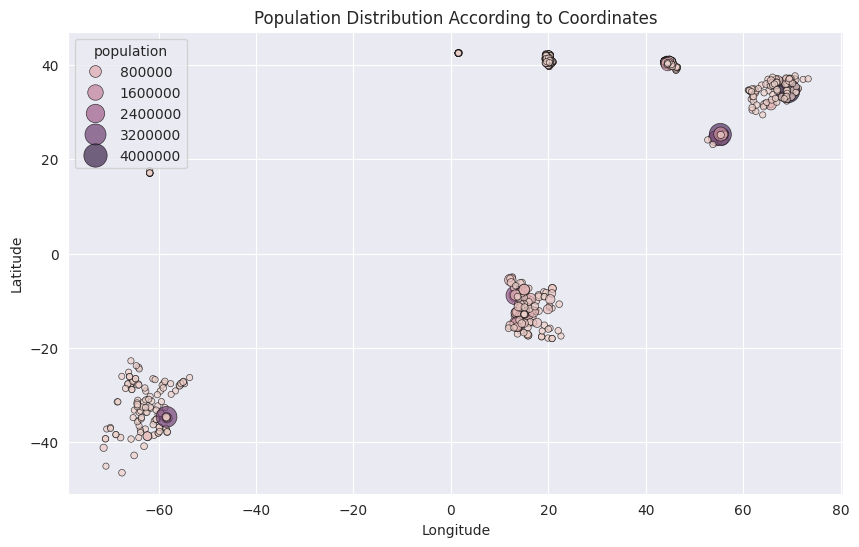

In [ ]:
sns.set_style("darkgrid")
# הקוד יוצר תרשים עמודות שמציג את עשרת המדינות עם האוכלוסייה הגדולה ביותר.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', size='population', hue='population', data=df,
                alpha=0.7, sizes=(20, 300),
                marker='o', edgecolor='black', linewidth=0.5)
plt.title('Population Distribution According to Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<ipython-input-21-d939a2a357a4>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country', y='population', data=df_top_countries, estimator=sum, ci=None,


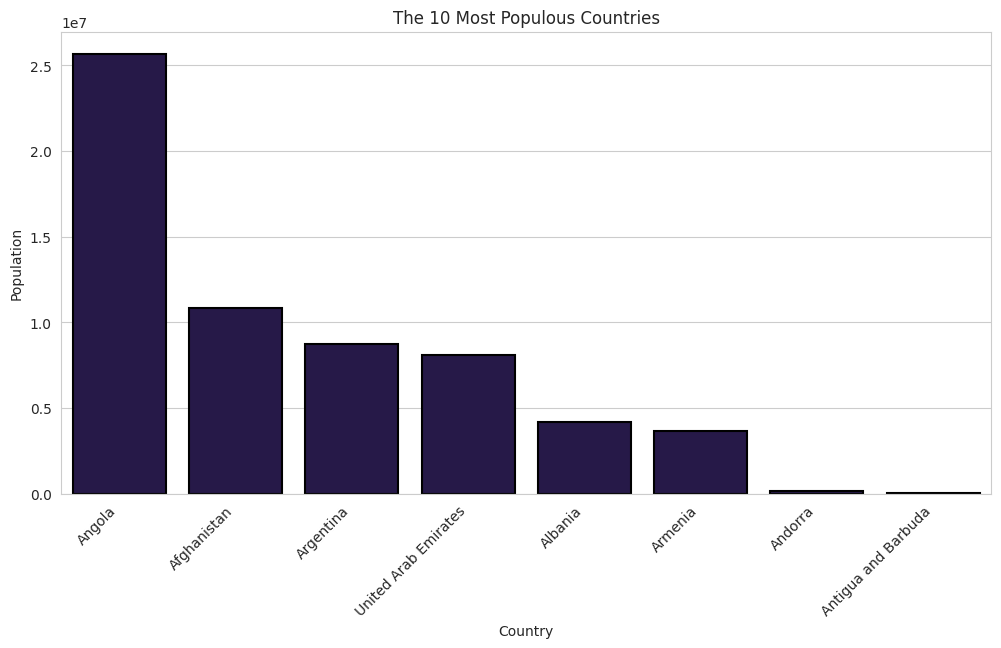

In [ ]:
df_top_countries = df.groupby('country')['population'].sum().nlargest(10).reset_index()
sns.set_style("whitegrid")
sns.set_palette("magma")
#הקוד יוצר תרשים עמודות שמציג את עשרת המדינות עם האוכלוסייה הגדולה ביותר.
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='population', data=df_top_countries, estimator=sum, ci=None,
            edgecolor='black', linewidth=1.5)
plt.title('The 10 Most Populous Countries')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
!pip install plotly


In [ ]:
import plotly.express as px   #הקוד לוקח נתונים גאוגרפיים על ערים מסוימות ומצייר אותן על מפת העולם, כאשר גודל הנקודות מייצג את גודל האוכלוסייה של כל עיר. כאשר מרחפים מעל נקודה כלשהי, מוצג שם העיר.

fig = px.scatter_geo(df, lat='latitude', lon='longitude', size='population',
                     hover_name='city', projection="natural earth")
fig.show()